In [1]:
from __future__ import print_function
import sys
import os
import errno
import stat
import shutil
import tempfile
import git
import pytest


def handle_remove_readonly(func, path, exc):
    excvalue = exc[1]
    if func in (os.unlink, os.rmdir, os.remove) and excvalue.errno == errno.EACCES:
        os.chmod(path, stat.S_IRWXU| stat.S_IRWXG| stat.S_IRWXO) # 0777
        func(path)
    else:
        raise


class TempRepo(git.Repo):
    @staticmethod
    def clone_from_to_temp(url, **kwargs):
        directory_name = tempfile.mkdtemp()
        return TempRepo.clone_from(url, directory_name, **kwargs)

    @property
    def directory(self):
        return os.path.abspath(os.path.join(self.git_dir, '..'))

    def __exit__(self, type, value, traceback):
        print('woot: ' + self.directory)
        shutil.rmtree(self.directory, ignore_errors=False, onerror=handle_remove_readonly)
        
        return git.Repo.__exit__(self, type, value, traceback)





C:\Users\Artur\AppData\Local\Temp\tmplc0s8cah
============================= test session starts =============================
platform win32 -- Python 3.6.2, pytest-3.2.1, py-1.4.34, pluggy-0.4.0
rootdir: C:\Users\Artur\AppData\Local\Temp\tmplc0s8cah, inifile:
collected 104 items

..\..\..\..\AppData\Local\Temp\tmplc0s8cah\tests\test_middlewares.py ........
..\..\..\..\AppData\Local\Temp\tmplc0s8cah\tests\test_operations.py .......
..\..\..\..\AppData\Local\Temp\tmplc0s8cah\tests\test_queries.py ....................
..\..\..\..\AppData\Local\Temp\tmplc0s8cah\tests\test_storages.py ...........
..\..\..\..\AppData\Local\Temp\tmplc0s8cah\tests\test_tables.py ........
..\..\..\..\AppData\Local\Temp\tmplc0s8cah\tests\test_tinydb.py ............................ss..........
..\..\..\..\AppData\Local\Temp\tmplc0s8cah\tests\test_utils.py ..........

==================== 102 passed, 2 skipped in 0.99 seconds ====================
woot: C:\Users\Artur\AppData\Local\Temp\tmplc0s8cah


In [2]:
with TempRepo.clone_from_to_temp('https://github.com/msiemens/tinydb', branch='master') as repo:
    print(repo.directory)
    pytest.main([repo.directory])

Traceback (most recent call last):
  File "C:\Users\Artur\Development\Anaconda3\envs\python3\lib\site-packages\_pytest\config.py", line 342, in _getconftestmodules
    return self._path2confmods[path]
KeyError: local('C:\\Users\\Artur\\AppData\\Local\\Temp\\tmp6zez1bcl\\tests')

During handling of the above exception, another exception occurred:
Traceback (most recent call last):
  File "C:\Users\Artur\Development\Anaconda3\envs\python3\lib\site-packages\_pytest\config.py", line 373, in _importconftest
    return self._conftestpath2mod[conftestpath]
KeyError: local('C:\\Users\\Artur\\AppData\\Local\\Temp\\tmp6zez1bcl\\tests\\conftest.py')

During handling of the above exception, another exception occurred:
Traceback (most recent call last):
  File "C:\Users\Artur\Development\Anaconda3\envs\python3\lib\site-packages\_pytest\config.py", line 379, in _importconftest
    mod = conftestpath.pyimport()
  File "C:\Users\Artur\Development\Anaconda3\envs\python3\lib\site-packages\py\_path\local

C:\Users\Artur\AppData\Local\Temp\tmp6zez1bcl
woot: C:\Users\Artur\AppData\Local\Temp\tmp6zez1bcl


C:\Users\Artur\Development\workspace\MachineLearning\src\aevb.py
C:\Users\Artur\Development\workspace\MachineLearning\src\aevb_example.py
C:\Users\Artur\Development\workspace\MachineLearning\src\archetypal_analysis.py
C:\Users\Artur\Development\workspace\MachineLearning\src\archetype_example.py
C:\Users\Artur\Development\workspace\MachineLearning\src\extract_features_inception.py
C:\Users\Artur\Development\workspace\MachineLearning\src\__init__.py


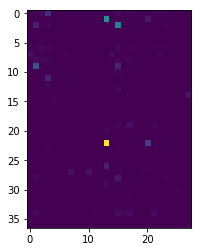

In [8]:
import ast
from collections import Counter
from collections import defaultdict
import os

pairs = []
list_data = []

def do_lists(parent, keyword, child_list):
#    list_data[(parent, keyword)] += child_list + [None]
    for child in child_list:
        if child is None:
            list_data.append(((str(type(parent)), keyword), None))
        else:
            list_data.append(((str(type(parent)), keyword), str(type(child))))

def walk2(node):
    parent = node
    for keyword, child in ast.iter_fields(node):
        if isinstance(child, ast.AST):
            pairs.append(((str(type(parent)), keyword), str(type(child))))
            walk2(child)
        elif isinstance(child, list):
            do_lists(parent, keyword, child)
            for item in child:
                if isinstance(item, ast.AST):
                    walk2(item)


directory = r'C:\Users\Artur\Development\workspace\MachineLearning\src'

for file in os.listdir(directory):
    if file.endswith('.py'):
        path = os.path.join(directory, file)
        print(path)
        
        with open(path, 'r') as python_file:
            python_code = python_file.read()
        python_ast = ast.parse(python_code)

        walk2(python_ast)

#counter_data = Counter(list_data)

import pandas as pd

pairs = pd.DataFrame(pairs)
pairs.columns = ['parent', 'child']

frequency = pd.crosstab(pairs.parent, pairs.child)

list_data = pd.DataFrame(list_data)
list_data.columns = ['parent', 'child']
frequency_list_data = pd.crosstab(list_data.parent, list_data.child)

import matplotlib.pylab as plt
%matplotlib inline 

plt.imshow(frequency.values)

In [9]:
import numpy as np
frequency = frequency.astype(np.float)
frequency.values[:] = frequency.values / frequency.values.sum(axis=1, keepdims=True)

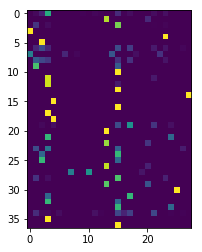

In [10]:
plt.imshow(frequency.values)

In [11]:
frequency.columns

Index(['<class '_ast.Add'>', '<class '_ast.Attribute'>',
       '<class '_ast.BinOp'>', '<class '_ast.Call'>', '<class '_ast.Compare'>',
       '<class '_ast.Dict'>', '<class '_ast.Div'>', '<class '_ast.ExtSlice'>',
       '<class '_ast.FloorDiv'>', '<class '_ast.IfExp'>',
       '<class '_ast.Index'>', '<class '_ast.List'>',
       '<class '_ast.ListComp'>', '<class '_ast.Load'>', '<class '_ast.Mult'>',
       '<class '_ast.Name'>', '<class '_ast.NameConstant'>',
       '<class '_ast.Num'>', '<class '_ast.Pow'>', '<class '_ast.Slice'>',
       '<class '_ast.Store'>', '<class '_ast.Str'>', '<class '_ast.Sub'>',
       '<class '_ast.Subscript'>', '<class '_ast.Tuple'>',
       '<class '_ast.USub'>', '<class '_ast.UnaryOp'>',
       '<class '_ast.arguments'>'],
      dtype='object', name='child')

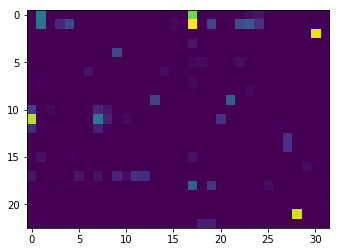

In [12]:
plt.imshow(frequency_list_data.values)

In [13]:
frequency_list_data

child,<class '_ast.Assign'>,<class '_ast.Attribute'>,<class '_ast.AugAssign'>,<class '_ast.BinOp'>,<class '_ast.Call'>,<class '_ast.ClassDef'>,<class '_ast.Eq'>,<class '_ast.Expr'>,<class '_ast.For'>,<class '_ast.FunctionDef'>,...,<class '_ast.Str'>,<class '_ast.Subscript'>,<class '_ast.Tuple'>,<class '_ast.UnaryOp'>,<class '_ast.With'>,<class '_ast.alias'>,<class '_ast.arg'>,<class '_ast.comprehension'>,<class '_ast.keyword'>,<class '_ast.withitem'>
parent,,,,,,,,,,,,,,,,,,,,,
"(<class '_ast.Assign'>, targets)",0,37,0,0,0,0,0,0,0,0,...,0,3,5,0,0,0,0,0,0,0
"(<class '_ast.Call'>, args)",0,34,0,11,20,0,0,0,0,0,...,21,26,13,0,0,0,0,0,0,0
"(<class '_ast.Call'>, keywords)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,89,0
"(<class '_ast.ClassDef'>, bases)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(<class '_ast.ClassDef'>, body)",0,0,0,0,0,0,0,0,0,20,...,0,0,0,0,0,0,0,0,0,0
"(<class '_ast.Compare'>, comparators)",0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
"(<class '_ast.Compare'>, ops)",0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(<class '_ast.Dict'>, keys)",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(<class '_ast.Dict'>, values)",0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
